# <center>Customer segmentation</center>
### **<center> A K means clustering proyect  </center>**

### **<center>Mijail Dragowski</center>**
### **<center>2023</center>**

### Import the necesary libraris


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.cluster import KMeans



### load the data set


In [3]:
df = pd.read_csv("Mall_Customers.csv")

### View of the first 5 rows of the dataframe to confirm that the dataframe is loaded correctly


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Check the number of rows and columns

In [5]:
df.shape

(200, 5)

### Check and count dataset missing values 


In [6]:
for column in  df.isnull().columns.values.tolist():
    print(column)
    print ( df.isnull()[column].value_counts())
    print("")   

CustomerID
False    200
Name: CustomerID, dtype: int64

Gender
False    200
Name: Gender, dtype: int64

Age
False    200
Name: Age, dtype: int64

Annual Income (k$)
False    200
Name: Annual Income (k$), dtype: int64

Spending Score (1-100)
False    200
Name: Spending Score (1-100), dtype: int64



### Check for duplicate rows


In [7]:
df.duplicated().sum()

0

### We see the dataframe descriptive statistics


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### We plot histograms of the variables to visualize their respective distributions


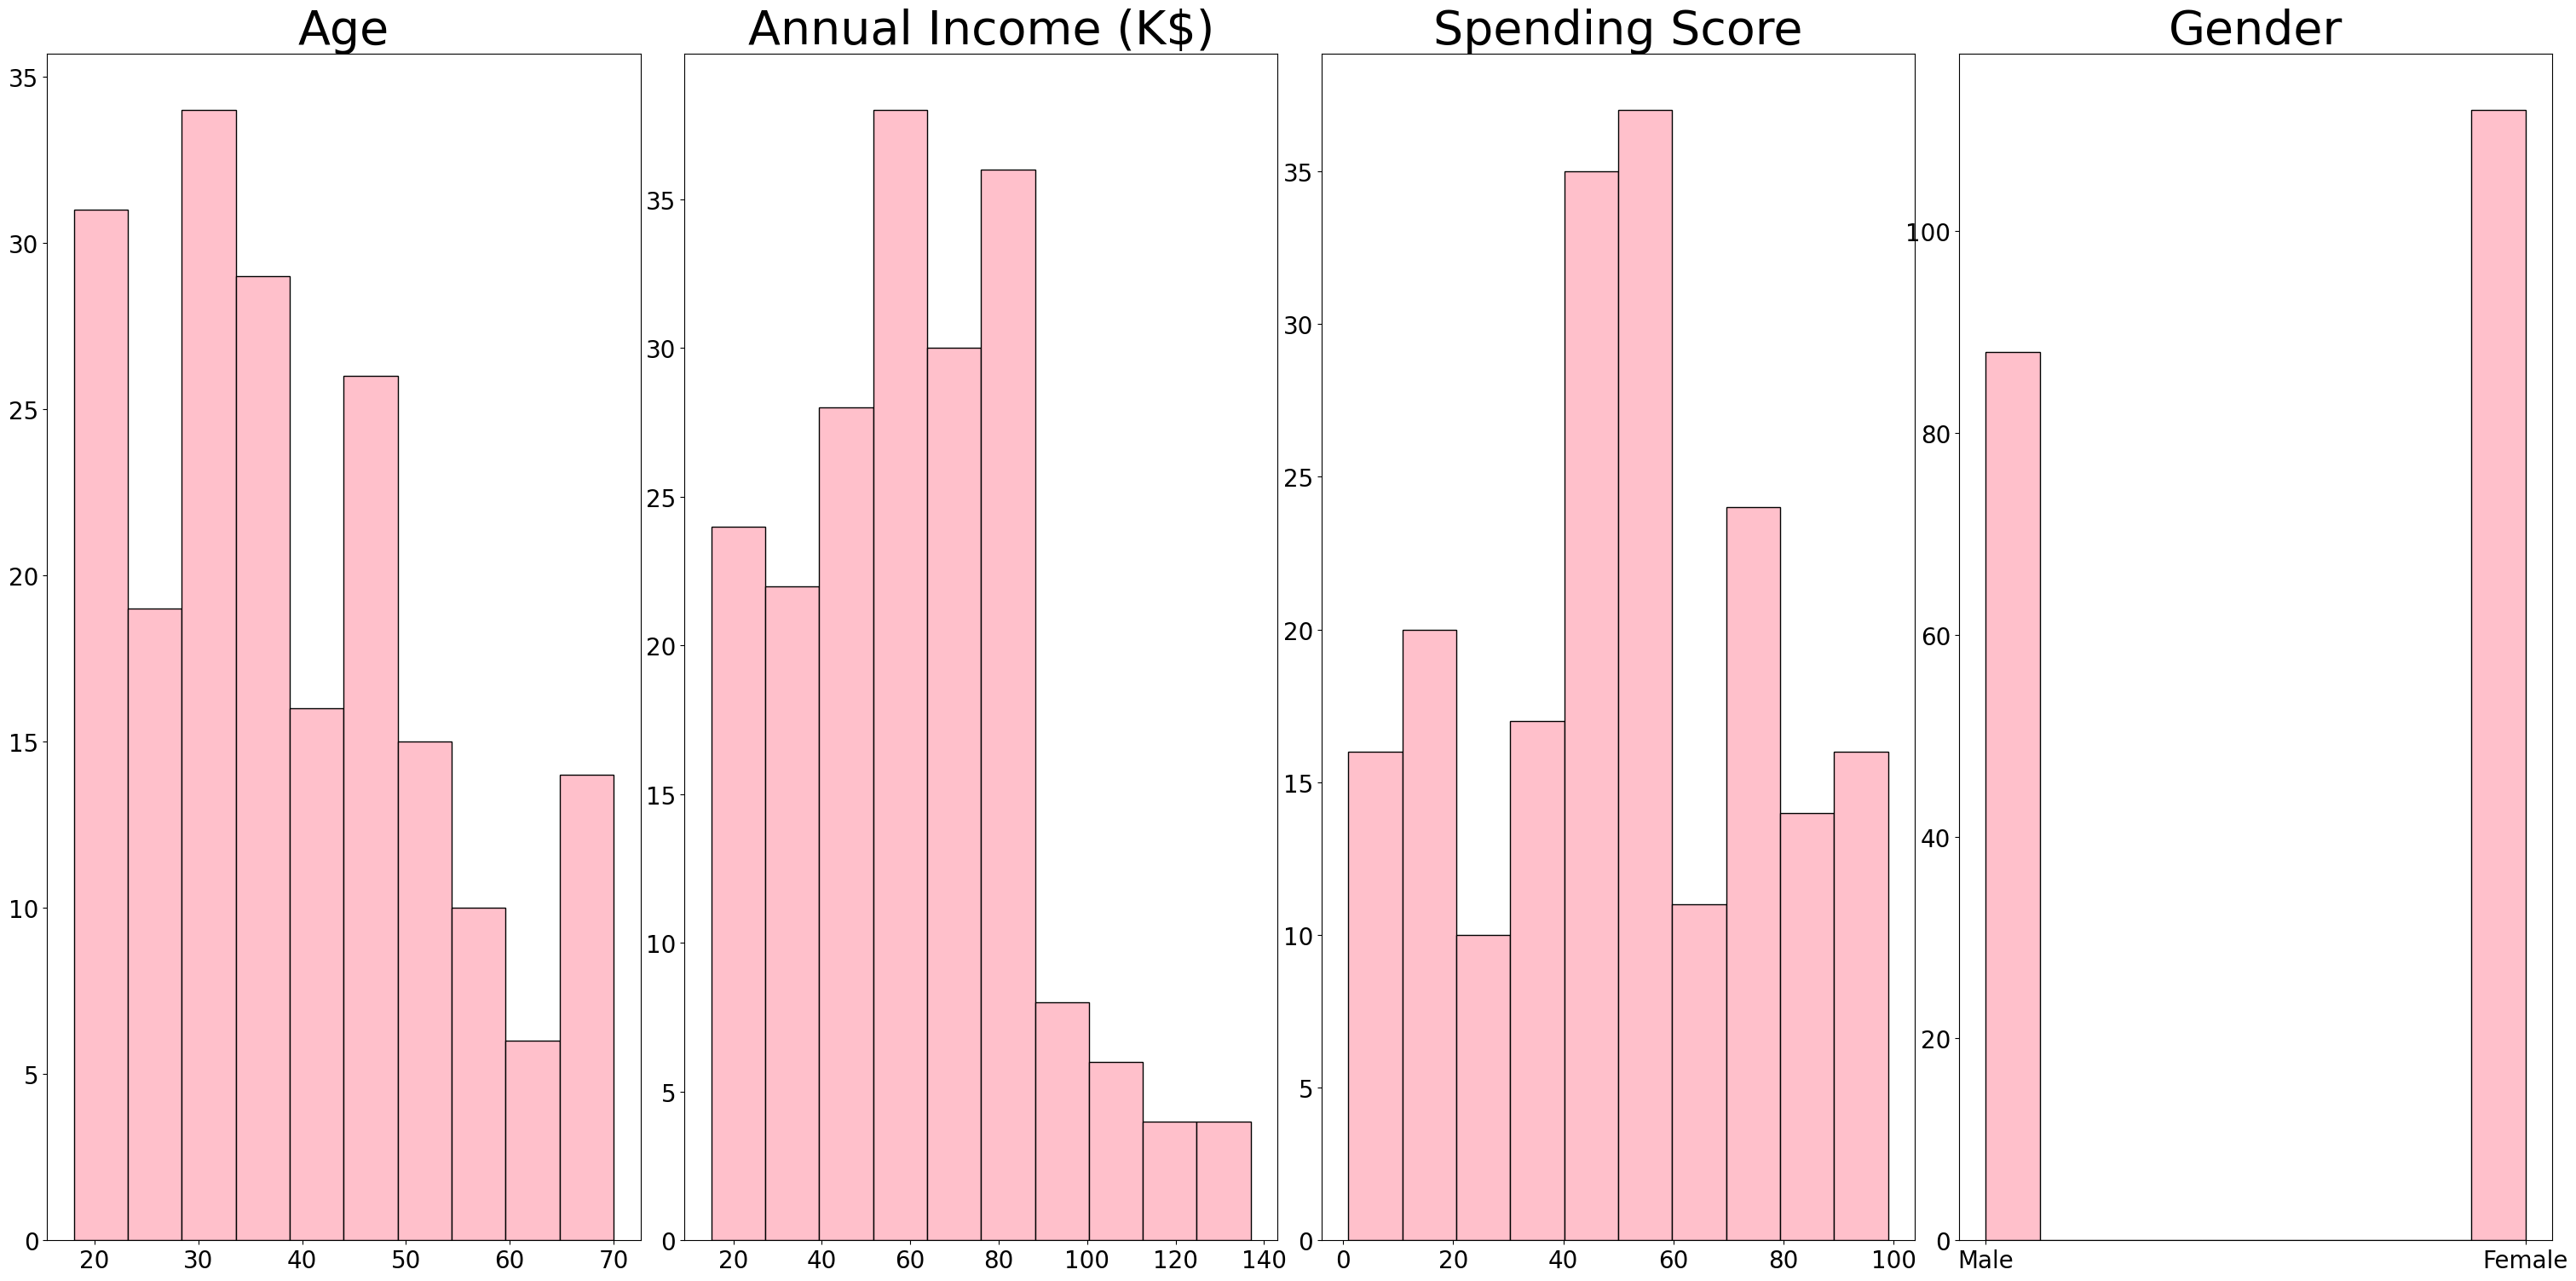

In [9]:
Age=df["Age"]
Annual_Income=df["Annual Income (k$)"]
Spending_Score=df["Spending Score (1-100)"]
Gender=df["Gender"]


fig,ax=plt.subplots(nrows=1, ncols=4, figsize=(30, 15))
ax[0].hist(Age, color="pink", ec="black")
ax[1].hist(Annual_Income,  color="pink", ec="black")
ax[2].hist(Spending_Score,  color="pink", ec="black")
ax[3].hist(Gender,  color="pink", ec="black")



ax[0].set_title("Age", fontsize=40)
ax[1].set_title("Annual Income (K$)", fontsize=40)
ax[2].set_title("Spending Score", fontsize=40)
ax[3].set_title("Gender", fontsize=40)



fig.tight_layout()
for ax in ax:
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.show

### We delete from the data set the innecesary variable 


In [10]:
df=df.drop(columns=["CustomerID"])

### We transform the variable gender to a dummy because  The k-means algorithm isn't directly applicable to categorical variables


In [11]:
df = pd.get_dummies(df, columns=['Gender'])
df=df.drop(columns=["Gender_Female"])
df.rename(columns={'Gender_Male': 'Gender'}, inplace=True)

df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


# Modeling k-means cluster


### We perform the elbow method to find the optimal number of clusters

/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` w

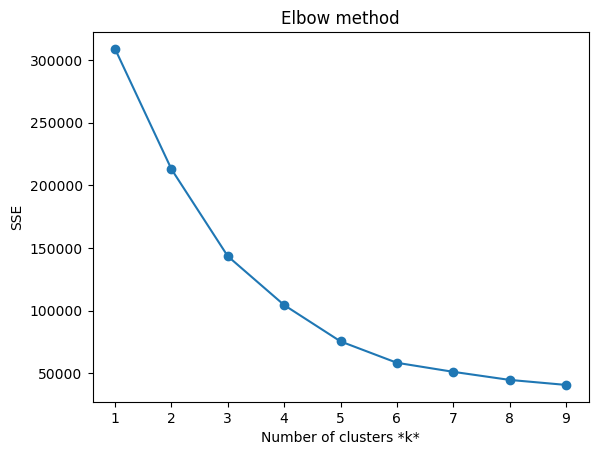

In [13]:
X = df
# Initialize lists to save the SSE for each number of clusterssse = []
sse=[]
list_k = list(range(1, 10))


# Perform a K-Means test for each possible number of clustersfor k in list_k:
for k in list_k:
    km=KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
# Create the SSE graph for each number of clusters

plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('SSE')
plt.title('Elbow method')

# Find the optimal number of clusters

n = sse.index(min(sse)) + 1  # add 1 because indices start at 0
# show the graph

plt.show()


### We develop the model


In [14]:
clusterNum = 6
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3
 5 3 5 4 5 4 0 3 5 4 0 0 0 4 0 0 4 4 4 4 4 0 4 4 0 4 4 4 0 4 4 0 0 4 4 4 4
 4 0 4 0 0 4 4 0 4 4 0 4 4 0 0 4 4 0 4 0 0 0 4 0 4 0 0 4 4 0 4 0 4 4 4 4 4
 0 0 0 0 0 4 4 4 4 0 0 0 1 0 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


### We transform the array with the cluster values into a dataframe


In [15]:
DF = pd.DataFrame(labels, columns=["Clusters"])
DF.head()

,Clusters
0,3
1,5
2,3
3,5
4,3


### We join the cluster data frame to the original data frame


In [ ]:
result = pd.concat([df, DF], axis=1)


# Results

### Now we can see for each observation to which cluster it belongs


In [17]:
result.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender,Clusters
0,19,15,39,1,3
1,21,15,81,1,5
2,20,16,6,0,3
3,23,16,77,0,5
4,31,17,40,0,3


### We see how many clients there are for each cluster 


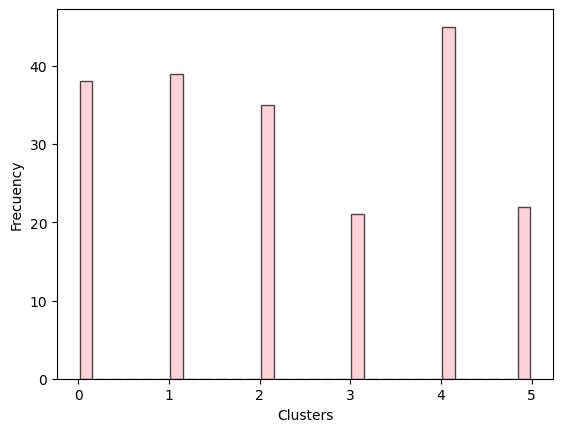

In [21]:
n, bins, patches = plt.hist(result["Clusters"], bins=30, color='pink', alpha=0.7, rwidth=0.85, ec="black")
plt.xlabel('Clusters')
plt.ylabel('Frecuency')
plt.show()

### For each cluster we can see its  average characteristics 


In [52]:
cluster = result.groupby("Clusters").mean()
cluster.rename(columns={'Spending Score (1-100)': 'Spending Score'}, inplace=True)

cluster

,Age,Annual Income (k$),Spending Score,Gender
Clusters,,,,
0,27.000000,56.657895,49.131579,0.342105
1,32.692308,86.538462,82.128205,0.461538
2,41.685714,88.228571,17.285714,0.571429
3,44.142857,25.142857,19.523810,0.380952
4,56.155556,53.377778,49.088889,0.444444
5,25.272727,25.727273,79.363636,0.409091


## We plot the average values of each cluster

### Cluster 0

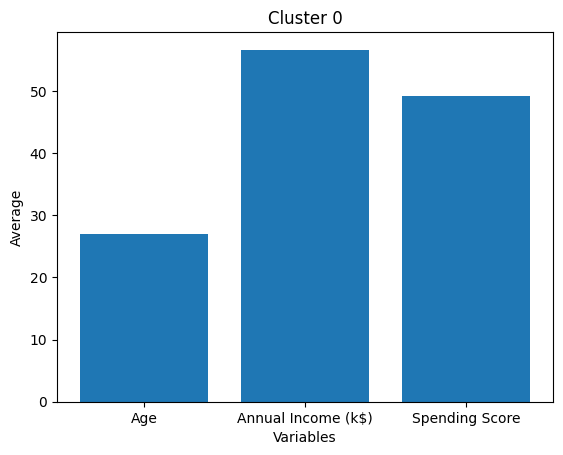

In [57]:
cluster=cluster.drop(columns=["Gender"])
Cluster_0= cluster.loc[0]
plt.bar(Cluster_0.index, Cluster_0.values)
plt.title('Cluster 0')
plt.xlabel('Variables')
plt.ylabel('Average')
plt.show()

### Cluster 1


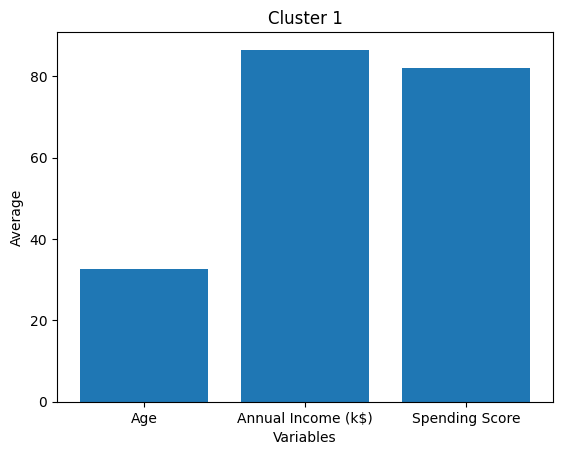

In [60]:
Cluster_1= cluster.loc[1]
plt.bar(Cluster_1.index, Cluster_1.values)
plt.title('Cluster 1')
plt.xlabel('Variables')
plt.ylabel('Average')
plt.show()

### Cluster 2

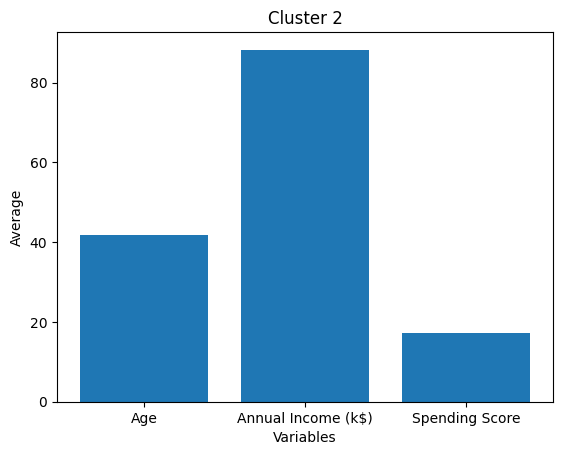

In [61]:
Cluster_2= cluster.loc[2]
plt.bar(Cluster_2.index, Cluster_2.values)
plt.title('Cluster 2')
plt.xlabel('Variables')
plt.ylabel('Average')
plt.show()

### Cluster 3

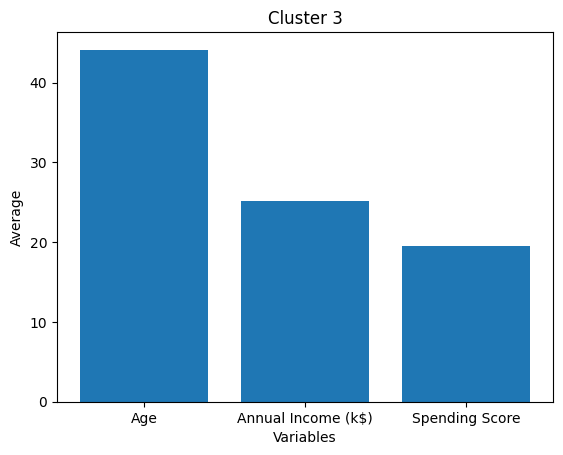

In [62]:
Cluster_3= cluster.loc[3]
plt.bar(Cluster_3.index, Cluster_3.values)
plt.title('Cluster 3')
plt.xlabel('Variables')
plt.ylabel('Average')
plt.show()

### Cluster 4

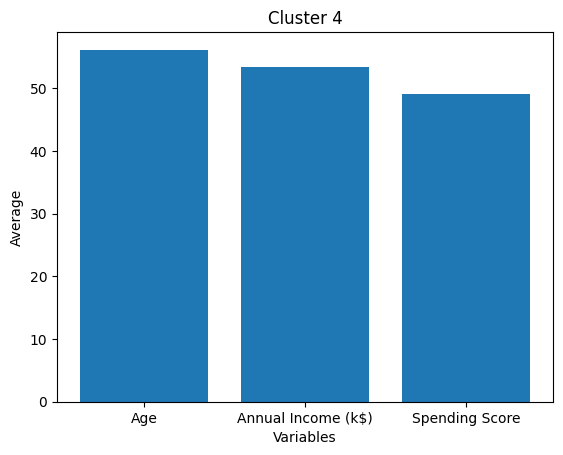

In [64]:
Cluster_4= cluster.loc[4]

plt.bar(Cluster_4.index, Cluster_4.values)
plt.title('Cluster 4')
plt.xlabel('Variables')
plt.ylabel('Average')

plt.show()

### Cluster 5

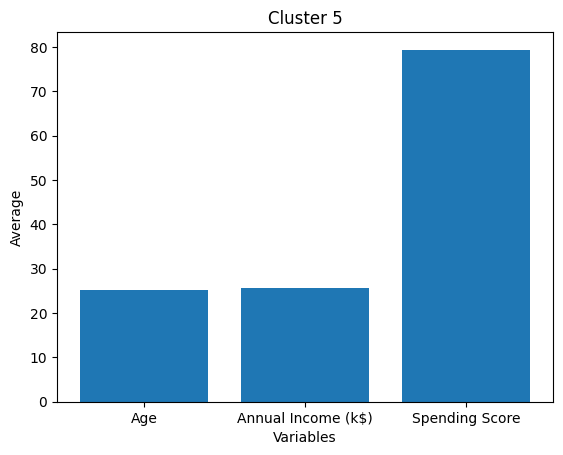

In [65]:
Cluster_5= cluster.loc[5]

plt.bar(Cluster_5.index, Cluster_5.values)
plt.title('Cluster 5')
plt.xlabel('Variables')
plt.ylabel('Average')

plt.show()